#### variables

In [88]:
num_classes = 10
baseMapNum = 32
weight_decay = 1e-4
batch_size = 50
epochs=75

#### import packages and load cifar10 data

In [89]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("Training Data Shape :","Training Data :",train_images.shape)
print("Training Label Shape :",train_labels.shape)
print("Test Data Shape :",test_images.shape)
print("Test Label Shape :",test_labels.shape)
print("Train Data Length :",len(train_images))
print("Test Data Length :",len(test_images))

Training Data Shape : Training Data : (50000, 32, 32, 3)
Training Label Shape : (50000, 1)
Test Data Shape : (10000, 32, 32, 3)
Test Label Shape : (10000, 1)
Train Data Length : 50000
Test Data Length : 10000


#### Data Preprocessing

In [90]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#calculate z-score
mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = (train_images-mean)/(std+1e-6)
test_images = (test_images-mean)/(std+1e-6)

#one hot encoding of labels
train_labels = np_utils.to_categorical(train_labels,num_classes)
test_labels = np_utils.to_categorical(test_labels,num_classes)

#split training data into partial_train and validation_images
#val_data = train_images[:10000]
#partial_train = train_images[10000:]
#val_labels = train_labels[:10000]
#partial_labels = train_labels[10000:]

#### generate model

In [91]:
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_61 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_62 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
__________

#### Data Augmentation

In [92]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(train_images)


#### fit model and evaluate

In [93]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=50),steps_per_epoch=1000,
                              epochs=epochs,
                              validation_data=datagen.flow(test_images, test_labels, batch_size=10),
                              validation_steps=1000)
model.save_weights('cifar10_normal_rms_ep75.h5')

Epoch 1/75
1000/1000 [==============================] - 41s 41ms/step - loss: 1.5897 - acc: 0.4933 - val_loss: 1.4443 - val_acc: 0.5661
Epoch 2/75
1000/1000 [==============================] - 38s 38ms/step - loss: 1.0907 - acc: 0.6470 - val_loss: 1.0470 - val_acc: 0.6642
Epoch 3/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.9294 - acc: 0.7078 - val_loss: 0.9398 - val_acc: 0.7205
Epoch 4/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.8501 - acc: 0.7372 - val_loss: 0.8300 - val_acc: 0.7455
Epoch 5/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.7887 - acc: 0.7592 - val_loss: 0.9138 - val_acc: 0.7296
Epoch 6/75
1000/1000 [==============================] - 37s 37ms/step - loss: 0.7551 - acc: 0.7767 - val_loss: 0.7982 - val_acc: 0.7661
Epoch 7/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.7197 - acc: 0.7909 - val_loss: 0.7683 - val_acc: 0.7752
Epoch 8/75
1000/1000 [==========================

Epoch 61/75
1000/1000 [==============================] - 40s 40ms/step - loss: 0.5029 - acc: 0.8852 - val_loss: 0.6573 - val_acc: 0.8459
Epoch 62/75
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5056 - acc: 0.8862 - val_loss: 0.6800 - val_acc: 0.8357
Epoch 63/75
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5029 - acc: 0.8886 - val_loss: 0.6445 - val_acc: 0.8496
Epoch 64/75
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5038 - acc: 0.8861 - val_loss: 0.6631 - val_acc: 0.8478
Epoch 65/75
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5049 - acc: 0.8874 - val_loss: 0.7029 - val_acc: 0.8371
Epoch 66/75
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5042 - acc: 0.8878 - val_loss: 0.6609 - val_acc: 0.8375
Epoch 67/75
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5030 - acc: 0.8882 - val_loss: 0.6302 - val_acc: 0.8513
Epoch 68/75
1000/1000 [==================

#### plot loss graph

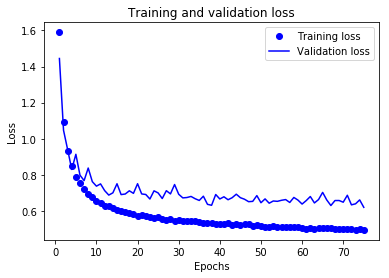

In [94]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### plot accuracy graph

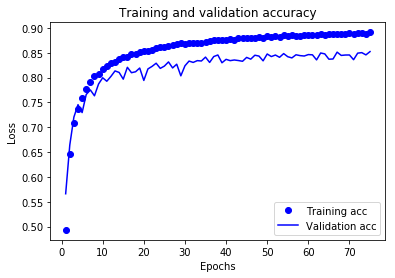

In [95]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Check output for sample

In [97]:
scores = model.evaluate(test_images, test_labels, batch_size=10)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))
predictions = model.predict(test_data)
print("Predicted label for test sample :",np.argmax(predictions[0]))
expected_label = [i for i, j in enumerate(test_labels[0]) if j == max(test_labels[0])]
print("Actual label for test sample :", expected_label)

10000/10000 [==============================] - 5s 532us/step

Test result: 87.880 loss: 0.546
Predicted label for test sample : 3
Actual label for test sample : [3]
